# "Sweet Insights: A Statistical Exploration of Apple Quality Using Python"


Attributes:
- A_id: Unique identifier for each fruit
- Size: Size of the fruit
- Weight: Weight of the fruit
- Sweetness: Degree of sweetness of the fruit
- Crunchiness: Texture indicating the crunchiness of the fruit
- Juiciness: Level of juiciness of the fruit
- Ripeness: Stage of ripeness of the fruit
- Acidity: Acidity level of the fruit
- Quality: Overall quality of the fruit

Data Source: https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality



# Importing Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset

In [2]:
data = pd.read_csv('apple_quality.csv')
data.head()

A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4   4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

        Acidity Quality  
0  -0.491590483    good  
1  -0.722809367    good  
2   2.621636473     bad  
3   0.790723217    good  
4   0.501984036    good

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [4]:
#Convert Acidity to Numerical
data['Acidity'] = pd.to_numeric(data['Acidity'], errors = 'coerce')
data = data.dropna()

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(8), object(1)
memory usage: 312.5+ KB


In [5]:
data.columns

Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import HTML

# Define Custom Color Palette
custom_palette = ['#8db051', '#f0f7da']

# Seaborn Theme
sns.set_style("whitegrid")
sns.set_palette(custom_palette)  # Apply the green palette

# Matplotlib Global Settings
plt.rcParams.update({
    "axes.facecolor": "white",       # Keep plots with a white background
    "figure.facecolor": "white",     # White figure background
    "axes.edgecolor": "#8db051",     # Greenish border
    "axes.labelcolor": "#4a5737",    # Darker green labels
    "xtick.color": "#4a5737",        # Green X-axis tick color
    "ytick.color": "#4a5737",        # Green Y-axis tick color
    "grid.color": "#d8e8c0",         # Light greenish grid color
    "text.color": "#4a5737",         # Darker text for better readability
    "axes.titleweight": "bold",
    "axes.titlesize": 14,
    "axes.labelsize": 12
})

# Apply Notebook Styling (White Background)
HTML("""
<style>
    body { background-color: white !important; }
    .jp-InputArea { background-color: white !important; border-radius: 10px; }
    .jp-CodeMirrorEditor { background-color: white !important; }
    .jp-Cell { border: 2px solid #8db051 !important; border-radius: 8px; }
</style>
""")


# Statistical Summary

In [7]:
data.describe()

A_id         Size       Weight    Sweetness  Crunchiness  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean   1999.500000    -0.503015    -0.989547    -0.470479     0.985478   
std    1154.844867     1.928059     1.602507     1.943441     1.402757   
min       0.000000    -7.151703    -7.149848    -6.894485    -6.055058   
25%     999.750000    -1.816765    -2.011770    -1.738425     0.062764   
50%    1999.500000    -0.513703    -0.984736    -0.504758     0.998249   
75%    2999.250000     0.805526     0.030976     0.801922     1.894234   
max    3999.000000     6.406367     5.790714     6.374916     7.619852   

         Juiciness     Ripeness      Acidity  
count  4000.000000  4000.000000  4000.000000  
mean      0.512118     0.498277     0.076877  
std       1.930286     1.874427     2.110270  
min      -5.961897    -5.864599    -7.010538  
25%      -0.801286    -0.771677    -1.377424  
50%       0.534219     0.503445     0.022609  
75%       1.835976     1.766212     1.510493  
max       7.364403     7.237837     7.404736

# Descriptive Statistics

In [8]:
df = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness','Ripeness', 'Acidity']

ds = pd.DataFrame({
    'Mean': data[df].mean(),
    'Median': data[df].median(),
    'Mode': data[df].mode().iloc[0],
    'Standard Deviation': data[df].std(),
    'Variance': data[df].var(),
    'Skewness': data[df].skew(),
    'Kurtosis': data[df].kurt()

})

ds

Mean    Median      Mode  Standard Deviation  Variance  \
Size        -0.503015 -0.513703 -7.151703            1.928059  3.717410   
Weight      -0.989547 -0.984736 -7.149848            1.602507  2.568029   
Sweetness   -0.470479 -0.504758 -6.894485            1.943441  3.776962   
Crunchiness  0.985478  0.998249 -6.055058            1.402757  1.967728   
Juiciness    0.512118  0.534219 -5.961897            1.930286  3.726003   
Ripeness     0.498277  0.503445 -5.864599            1.874427  3.513476   
Acidity      0.076877  0.022609 -7.010538            2.110270  4.453238   

             Skewness  Kurtosis  
Size        -0.002437 -0.083341  
Weight       0.003102  0.359050  
Sweetness    0.083850  0.014472  
Crunchiness  0.000230  0.722020  
Juiciness   -0.113421  0.028735  
Ripeness    -0.008764 -0.071850  
Acidity      0.055783 -0.093451

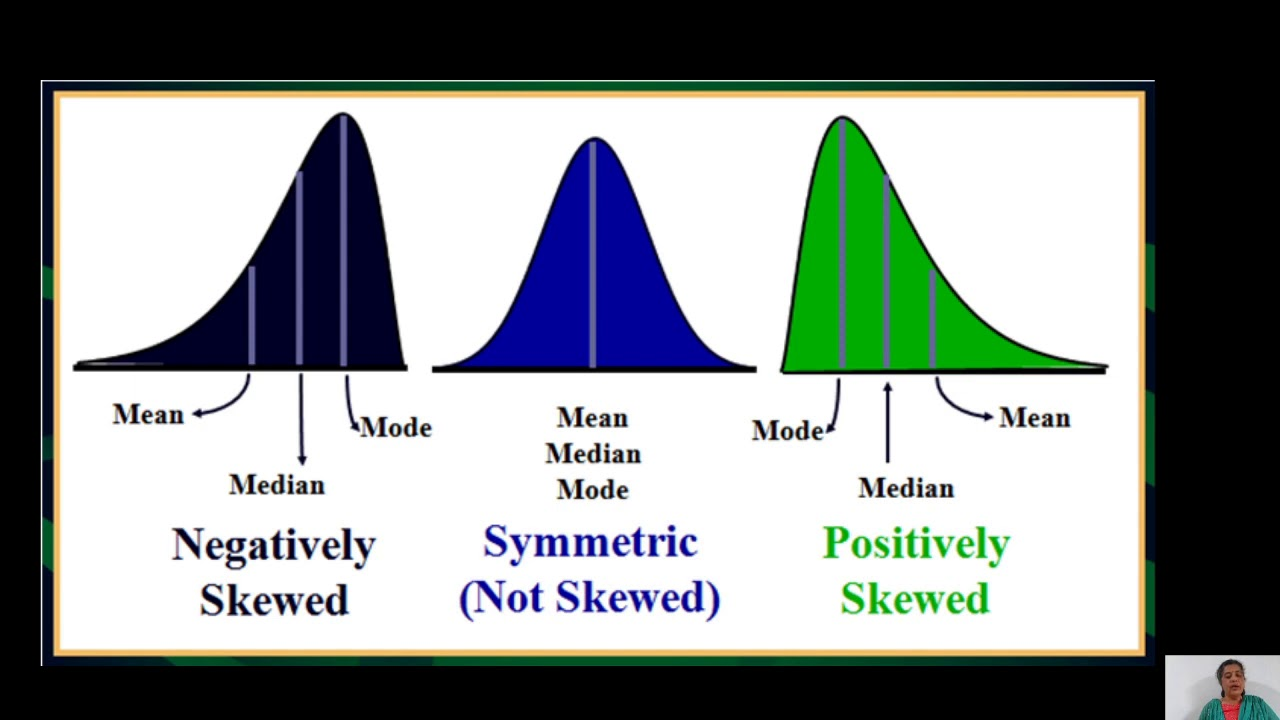

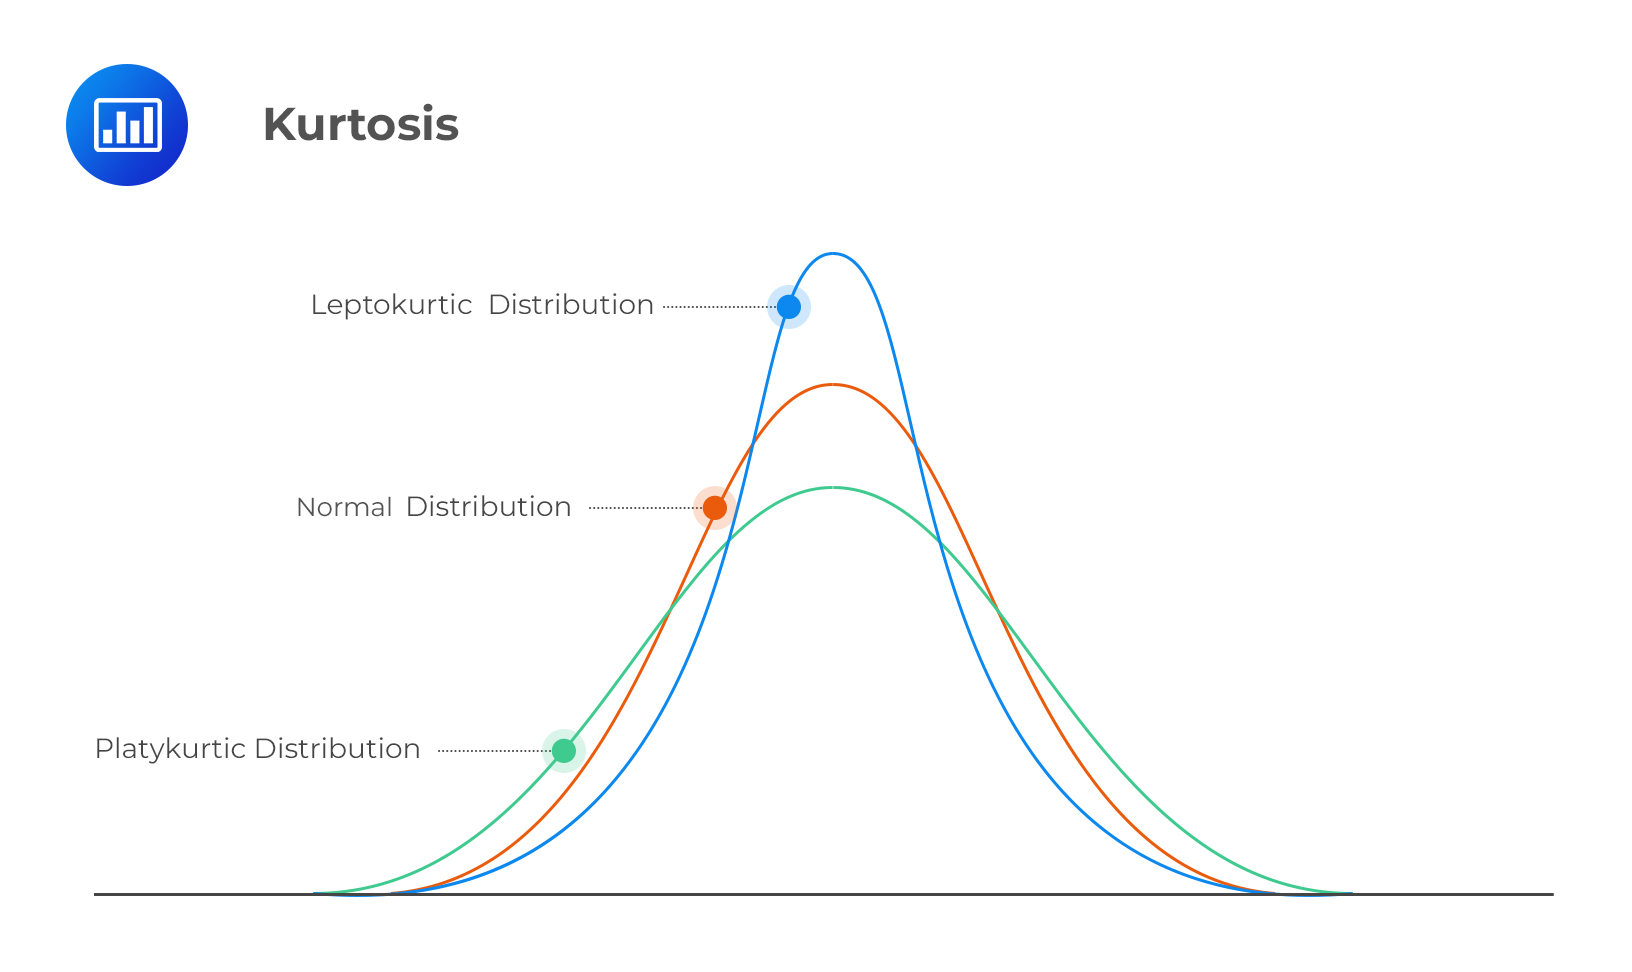

good    2004
bad     1996
Name: Quality, dtype: int64


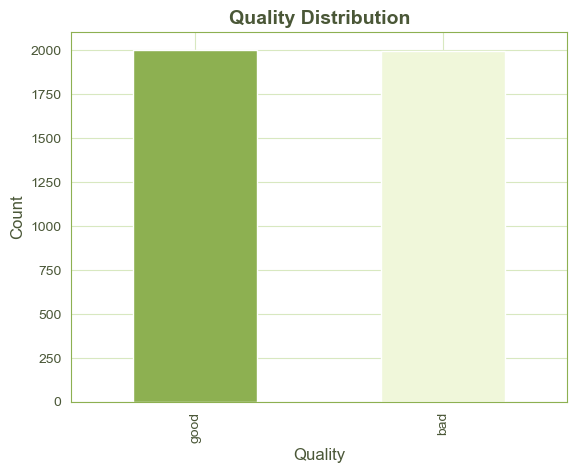

In [9]:
#Frequency Distribution of the Categorical Column

quality_counts = data['Quality'].value_counts()
print(quality_counts)

quality_counts.plot(kind='bar', title='Quality Distribution', color=['#8db051', '#f0f7da'])
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

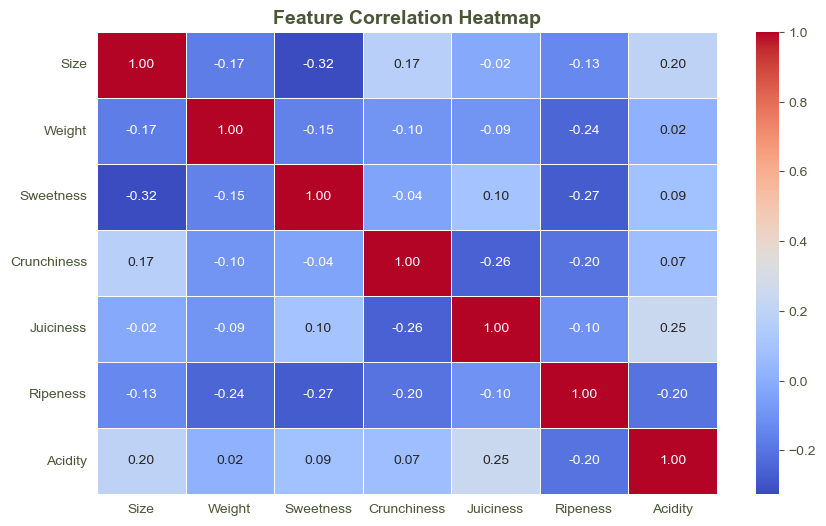

In [10]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data[df].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

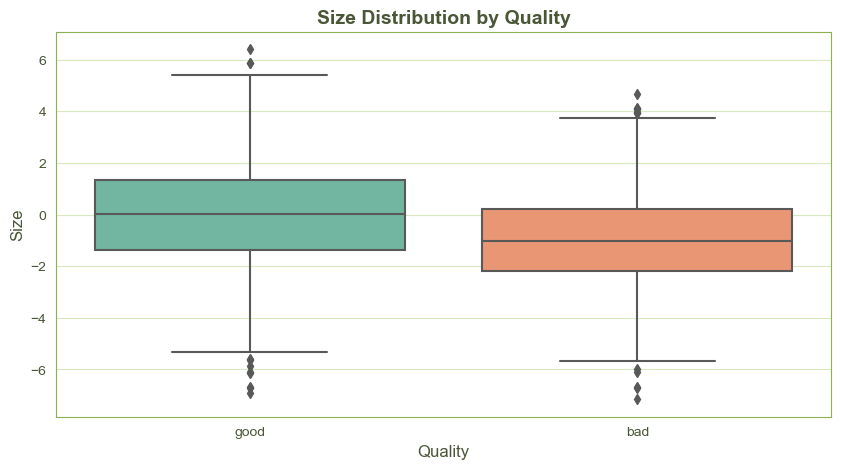

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Quality', y='Size', data=data, palette='Set2')
plt.title('Size Distribution by Quality')
plt.xlabel('Quality')
plt.ylabel('Size')
plt.show()

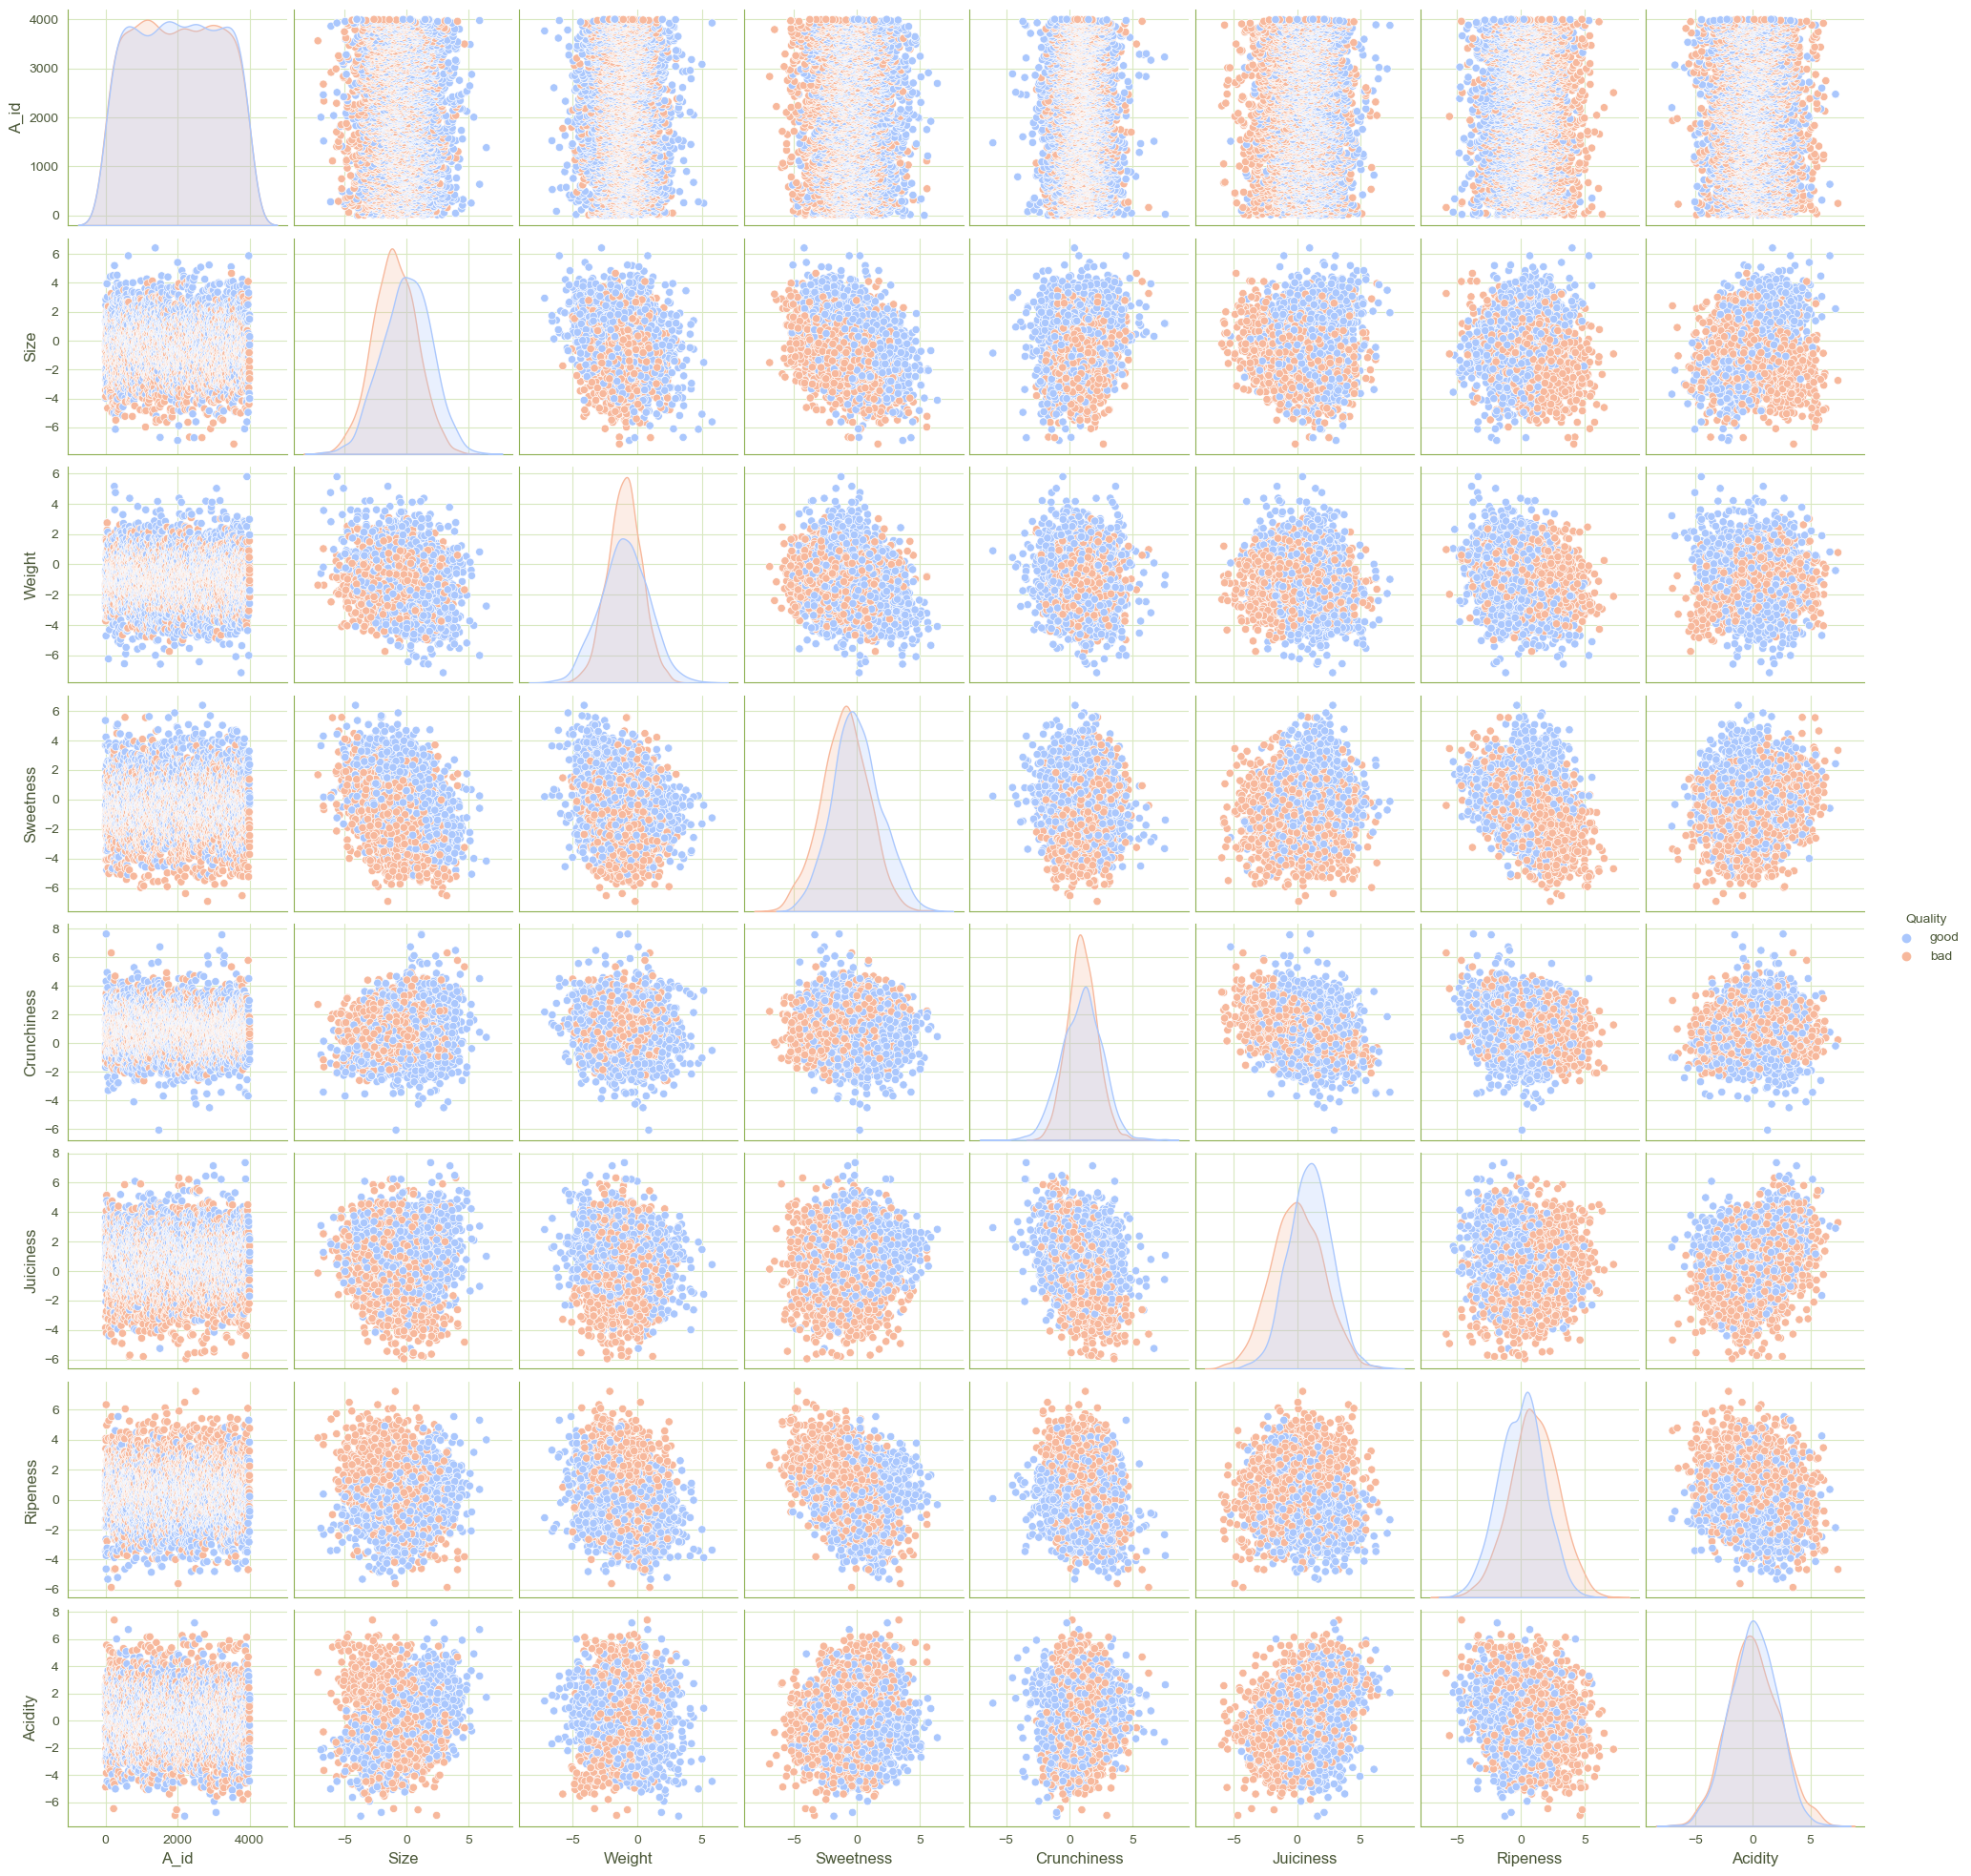

In [12]:
# Pairplot to Check Feature Interactions
sns.pairplot(data, hue="Quality", diag_kind="kde", palette="coolwarm")
plt.show()

# Hypothesis Tests

- Population
- Sample

1. Null(Ho): No significant relationship or effect

2. Alternate(Ha/H1): Significant relationship or effect


- T-Tests(<30)

   a. One sample (mean of Pop vs Sample)

   b. Independent Two Sample (Mean of Samp1 vs Samp2)

   c. Dependent two Sample (Means of Samp before vs After)


- Z tests(>30)

  (Mean-Std)/(sqrt[sd]/sample size)


- ANOVA: Number of 3 or more

- Chi-Square: Relationship between Categorical Data

- Significance Value (alpha): 0.01, 0.05, 0.1

- p value: probability Value

In [13]:
#Create two samples by spilitting
good = data[data['Quality'] == 'good']
bad = data[data['Quality'] == 'bad']

good.info()

bad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2004 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         2004 non-null   float64
 1   Size         2004 non-null   float64
 2   Weight       2004 non-null   float64
 3   Sweetness    2004 non-null   float64
 4   Crunchiness  2004 non-null   float64
 5   Juiciness    2004 non-null   float64
 6   Ripeness     2004 non-null   float64
 7   Acidity      2004 non-null   float64
 8   Quality      2004 non-null   object 
dtypes: float64(8), object(1)
memory usage: 156.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1996 entries, 2 to 3997
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         1996 non-null   float64
 1   Size         1996 non-null   float64
 2   Weight       1996 non-null   float64
 3   Sweetness    1996 non-null   float64
 4   Crunchiness  19

Ho - There is no siginificant differences or effect between the two samples.

Ha - There is a significant differences or effect between the two samples.


#T-tests

In [14]:
from scipy.stats import ttest_ind

#Numeric Column
valid_numeric = data.select_dtypes(include = ['float64', 'int64']).columns.tolist()
valid_numeric.remove('A_id')

#Independent tests
ttest_result = {
    col: ttest_ind(good[col], bad[col], equal_var = False, nan_policy= 'omit')
    for col in valid_numeric
}

for col, result in ttest_result.items():
  print(f'{col}: t-statistics= {result.statistic:.2f}, p-value= {result.pvalue:.2f}')

Size: t-statistics= 15.91, p-value= 0.00
Weight: t-statistics= 0.09, p-value= 0.93
Sweetness: t-statistics= 16.40, p-value= 0.00
Crunchiness: t-statistics= -0.78, p-value= 0.43
Juiciness: t-statistics= 17.03, p-value= 0.00
Ripeness: t-statistics= -17.33, p-value= 0.00
Acidity: t-statistics= -0.49, p-value= 0.63


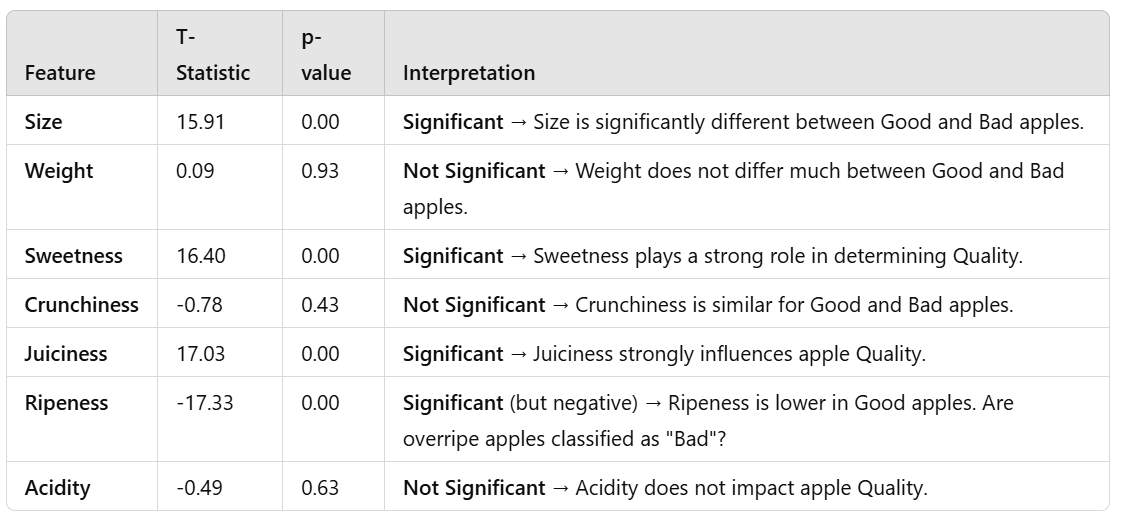

- Size, Sweetness, Juiciness, and Ripeness significantly impact apple Quality.
- Weight, Crunchiness, and Acidity do not significantly differentiate Good from Bad apples.
- Ripeness has a negative effect—are overripe apples classified as "Bad"?

# Chi - Square

In [23]:
from scipy.stats import chi2_contingency

#Convert Acidity to Categorical
data['Acidity_Level'] = data['Acidity'] > data['Acidity'].mean()
data.head()

#Chi2 Tests
cont_table = pd.crosstab(data['Quality'], data['Acidity'])
chi2, chip, dof, expected = chi2_contingency(cont_table)


print(f'Chi2 Statistics: {chi2:.2f}, p_Value: {chip:.2f}')

Chi2 Statistics: 4000.00, p_Value: 0.49


- p-value > 0.05 → We fail to reject the null hypothesis.
- This means no statistically significant relationship exists between the categorical variable tested (e.g., Acidity_Category) and Quality.
- The categorical variable does not strongly influence whether an apple is "Good" or "Bad".


# ANOVA

In [16]:
from scipy.stats import f_oneway

# Select only numeric columns (excluding ID if present)
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_columns.remove("A_id")  # Remove ID column if applicable

# Perform ANOVA test for each numeric column
anova_results = {
    col: f_oneway(good[col], bad[col])
    for col in numeric_columns
}

# Print results
for col, result in anova_results.items():
    print(f"{col}: F-Statistic = {result.statistic:.4f}, p-value = {result.pvalue:.4f}")


Size: F-Statistic = 253.1089, p-value = 0.0000
Weight: F-Statistic = 0.0081, p-value = 0.9284
Sweetness: F-Statistic = 268.8100, p-value = 0.0000
Crunchiness: F-Statistic = 0.6125, p-value = 0.4339
Juiciness: F-Statistic = 290.3918, p-value = 0.0000
Ripeness: F-Statistic = 300.2886, p-value = 0.0000
Acidity: F-Statistic = 0.2369, p-value = 0.6265


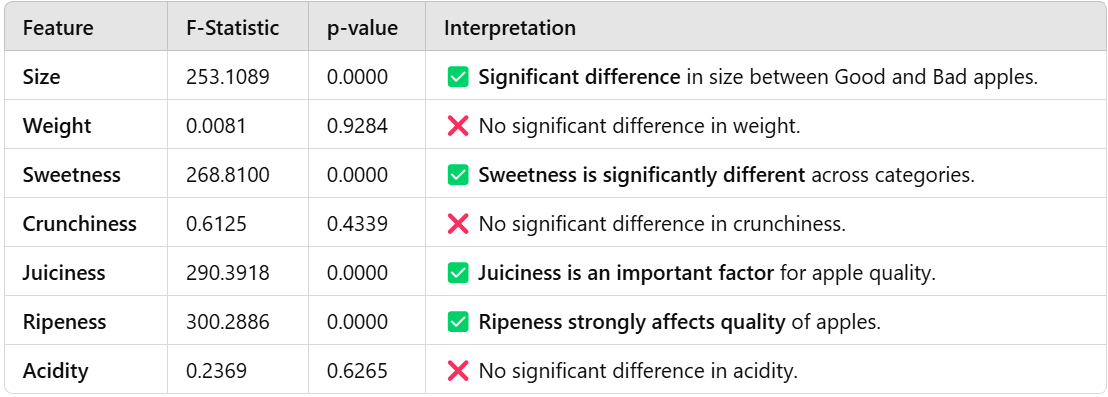

- Size, Sweetness, Juiciness, and Ripeness are statistically significant factors affecting apple quality (p-value < 0.05).
- Weight, Crunchiness, and Acidity do not significantly differentiate Good vs. Bad apples (p-value > 0.05).
- Weight (p = 0.9284) is the least relevant factor in determining apple quality.
- Ripeness (F = 300.29) has the strongest effect on quality.




---



---



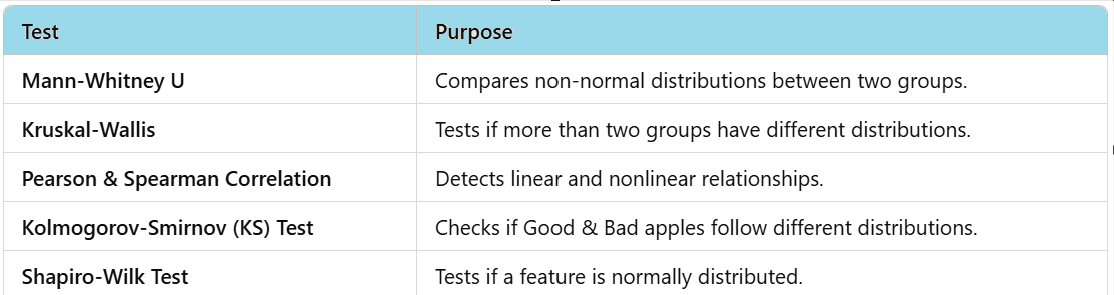

# Mann-Whitney U Test (For Non-Normally Distributed Data)

In [17]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test for numerical columns
mannwhitney_results = {
    col: mannwhitneyu(good[col], bad[col], alternative='two-sided')
    for col in numeric_columns
}

# Print results
for col, result in mannwhitney_results.items():
    print(f"{col}: U-Statistic = {result.statistic:.4f}, p-value = {result.pvalue:.4f}")


Size: U-Statistic = 2566460.0000, p-value = 0.0000
Weight: U-Statistic = 2003966.0000, p-value = 0.9134
Sweetness: U-Statistic = 2547835.0000, p-value = 0.0000
Crunchiness: U-Statistic = 2000668.0000, p-value = 0.9852
Juiciness: U-Statistic = 2596041.0000, p-value = 0.0000
Ripeness: U-Statistic = 1399257.0000, p-value = 0.0000
Acidity: U-Statistic = 2009387.0000, p-value = 0.7970


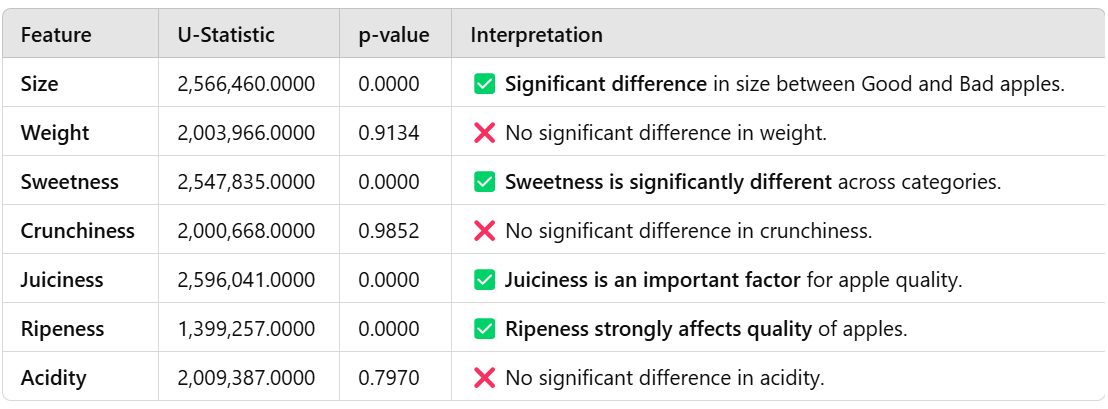

# Kruskal-Wallis Test (For More Than Two Groups)

In [18]:
from scipy.stats import kruskal

# Perform Kruskal-Wallis test for numerical columns
kruskal_results = {
    col: kruskal(*[group[col].values for _, group in data.groupby('Quality')])
    for col in numeric_columns
}

# Print results
for col, result in kruskal_results.items():
    print(f"{col}: H-Statistic = {result.statistic:.4f}, p-value = {result.pvalue:.4f}")


Size: H-Statistic = 240.6053, p-value = 0.0000
Weight: H-Statistic = 0.0118, p-value = 0.9133
Sweetness: H-Statistic = 225.0436, p-value = 0.0000
Crunchiness: H-Statistic = 0.0003, p-value = 0.9852
Juiciness: H-Statistic = 266.3903, p-value = 0.0000
Ripeness: H-Statistic = 270.5953, p-value = 0.0000
Acidity: H-Statistic = 0.0662, p-value = 0.7970


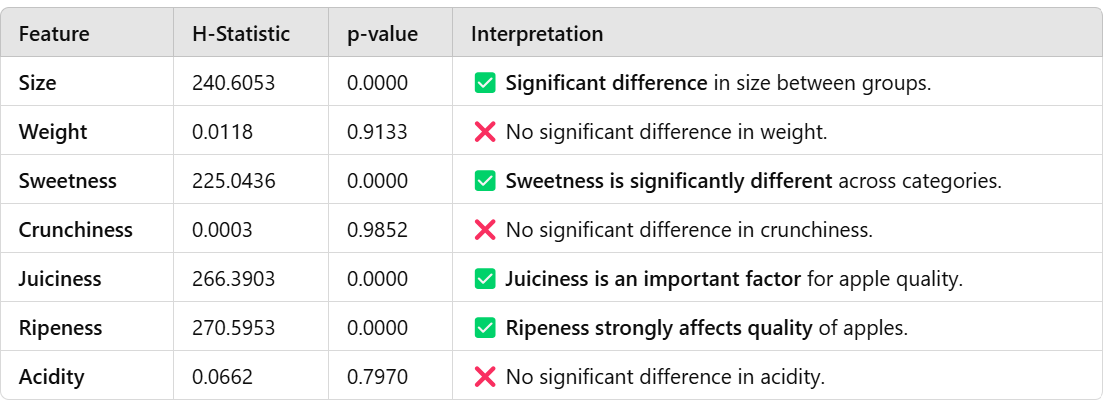

# Pearson & Spearman Correlation (Linear vs. Nonlinear Relationships)

In [19]:
from scipy.stats import pearsonr, spearmanr

# Compute Pearson and Spearman correlation with Quality (converted to numeric)
data['Quality_Binary'] = data['Quality'].apply(lambda x: 1 if x == 'good' else 0)

correlation_results = {
    col: {
        "Pearson": pearsonr(data[col], data['Quality_Binary']),
        "Spearman": spearmanr(data[col], data['Quality_Binary'])
    }
    for col in numeric_columns
}

# Print results
for col, result in correlation_results.items():
    print(f"{col}: Pearson Correlation = {result['Pearson'][0]:.4f}, p-value = {result['Pearson'][1]:.4f}")
    print(f"{col}: Spearman Correlation = {result['Spearman'][0]:.4f}, p-value = {result['Spearman'][1]:.4f}\n")


Size: Pearson Correlation = 0.2440, p-value = 0.0000
Size: Spearman Correlation = 0.2453, p-value = 0.0000

Weight: Pearson Correlation = 0.0014, p-value = 0.9284
Weight: Spearman Correlation = 0.0017, p-value = 0.9134

Sweetness: Pearson Correlation = 0.2510, p-value = 0.0000
Sweetness: Spearman Correlation = 0.2372, p-value = 0.0000

Crunchiness: Pearson Correlation = -0.0124, p-value = 0.4339
Crunchiness: Spearman Correlation = 0.0003, p-value = 0.9852

Juiciness: Pearson Correlation = 0.2602, p-value = 0.0000
Juiciness: Spearman Correlation = 0.2581, p-value = 0.0000

Ripeness: Pearson Correlation = -0.2643, p-value = 0.0000
Ripeness: Spearman Correlation = -0.2601, p-value = 0.0000

Acidity: Pearson Correlation = -0.0077, p-value = 0.6265
Acidity: Spearman Correlation = 0.0041, p-value = 0.7970



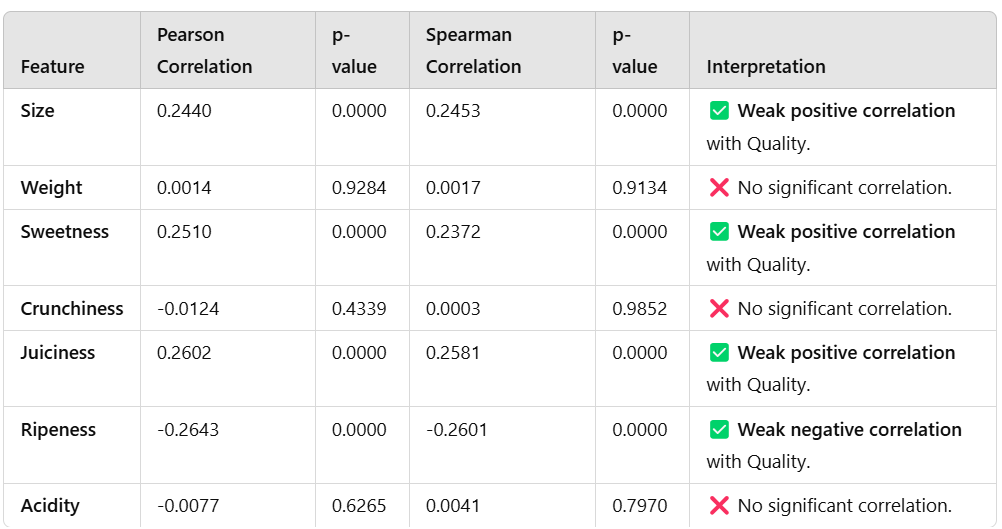

# Kolmogorov-Smirnov (KS) Test (Checks Distribution Similarity)

In [20]:
from scipy.stats import ks_2samp

# Perform KS test for numerical columns
ks_results = {
    col: ks_2samp(good[col], bad[col])
    for col in numeric_columns
}

# Print results
for col, result in ks_results.items():
    print(f"{col}: KS-Statistic = {result.statistic:.4f}, p-value = {result.pvalue:.4f}")


Size: KS-Statistic = 0.2156, p-value = 0.0000
Weight: KS-Statistic = 0.0978, p-value = 0.0000
Sweetness: KS-Statistic = 0.1919, p-value = 0.0000
Crunchiness: KS-Statistic = 0.0901, p-value = 0.0000
Juiciness: KS-Statistic = 0.2352, p-value = 0.0000
Ripeness: KS-Statistic = 0.2184, p-value = 0.0000
Acidity: KS-Statistic = 0.0366, p-value = 0.1328


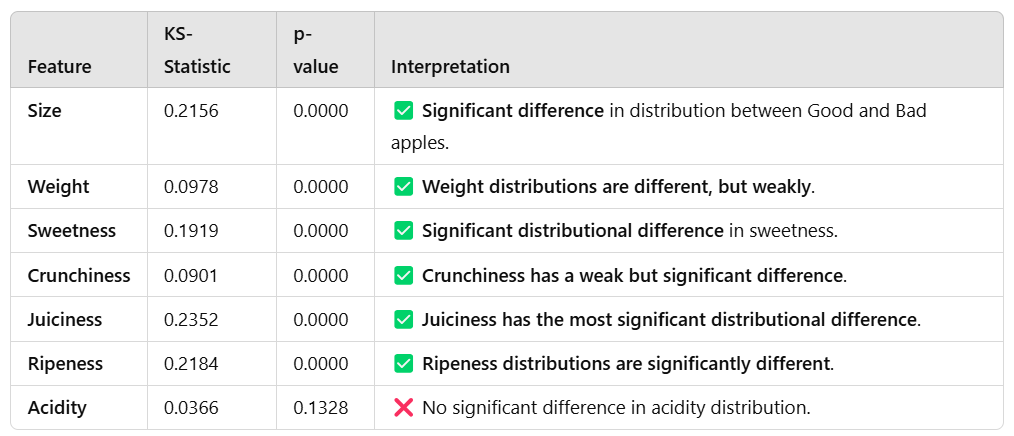

# Shapiro-Wilk Test (Normality Check)

In [21]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test for numerical columns
shapiro_results = {
    col: shapiro(data[col])
    for col in numeric_columns
}

# Print results
for col, result in shapiro_results.items():
    print(f"{col}: W-Statistic = {result.statistic:.4f}, p-value = {result.pvalue:.4f}")


Size: W-Statistic = 0.9997, p-value = 0.7846
Weight: W-Statistic = 0.9985, p-value = 0.0007
Sweetness: W-Statistic = 0.9989, p-value = 0.0134
Crunchiness: W-Statistic = 0.9963, p-value = 0.0000
Juiciness: W-Statistic = 0.9989, p-value = 0.0084
Ripeness: W-Statistic = 0.9997, p-value = 0.8409
Acidity: W-Statistic = 0.9993, p-value = 0.1605


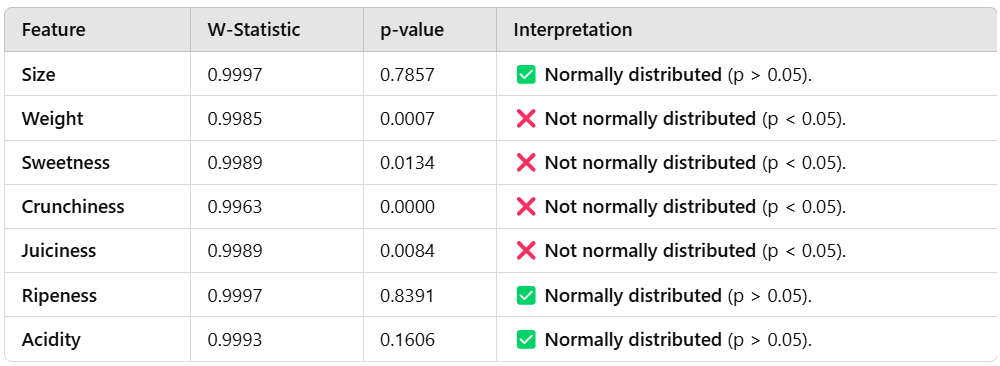